カメラ観測結果からリンクフローデータを作成

In [1]:
# とりあえず2023/01/29, 2023/01/30の08:00台，17:00台を集計
import pandas as pd 
import numpy as np 
import os 

/Users/takahiromatsunaga/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/takahiromatsunaga/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [23]:
basepath = '/Users/takahiromatsunaga/res2023/PPcameraTG/camera'
date = '20230130'
df = pd.read_csv(os.path.join(basepath, f'camera_{date}.csv'))

     Unnamed: 0       day  No  hour  min   ID  ID_camera  time     IN    OUT  \
0         12540  20230130   0     0    0  NaN          6  0:00   27.0   89.0   
1         12541  20230130   1     0   10  NaN          6  0:10   11.0   51.0   
2         12542  20230130   2     0   20  NaN          6  0:20    6.0   67.0   
3         12543  20230130   3     0   30  NaN          6  0:30    9.0   35.0   
4         12544  20230130   4     0   40  NaN          6  0:40    3.0   36.0   
..          ...       ...  ..   ...  ...  ...        ...   ...    ...    ...   
125       12583  20230130  43     9   10  NaN          6  9:10  215.0  496.0   
126       12584  20230130  44     9   20  NaN          6  9:20  233.0  454.0   
127       12585  20230130  45     9   30  NaN          6  9:30  162.0  561.0   
128       12586  20230130  46     9   40  NaN          6  9:40  132.0  461.0   
129       12587  20230130  47     9   50  NaN          6  9:50   79.0  373.0   

     count  
0      116  
1       62  


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

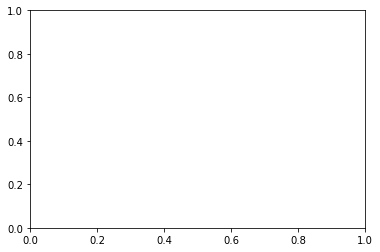

In [24]:
import matplotlib.pyplot as plt 

target_cameras = [1, 2, 3, 4, 5]
grouped = df.groupby('ID_camera')

# dfc_list = [group.reset_index(drop=True) for name, group in grouped]
# for dfc in dfc_list:
#     x1 = dfc['out']
#     x2 = dfc['in']


for name, group in grouped:
    group = group.sort_values(by = 'time').reset_index(drop=True)
    plt.figure()
    print(group)
    print(group['time'].shape)
    print(group['OUT'].shape)
    plt.plot(group['time'], group['OUT'], label='OUT')
    plt.plot(group['time'], group['IN'], label='IN')
    plt.xlabel('Time')
    plt.ylabel('Count')
    plt.title(f'Camera {name}')
    plt.legend()
    plt.savefig(os.path.join(basepath, f'graph_20230130/camera_{name}.png'))
    plt.close()

In [26]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '12:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '12:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)

{6: 464.25, 7: 315.0, 8: 27.0, 9: 407.25, 12: 798.0, 13: 771.0}


In [27]:
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 464.25, (10, 37): 342, (11, 34): 407.25, (14, 26): 798.0, (15, 27): 771.0}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_12'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/1791040884.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '464.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/1791040884.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '407.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value


In [22]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '08:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '08:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)

IndexError: single positional indexer is out-of-bounds

In [13]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '10:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '10:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 506.25, (10, 37): 300.25, (11, 34): 309.75, (14, 26): 667.5, (15, 27): 575.25}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230129_08'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


{6: 506.25, 7: 283.5, 8: 15.75, 9: 309.75, 12: 667.5, 13: 575.25}


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2303317447.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '506.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2303317447.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '300.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2303317447.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '309.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.

In [8]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '12:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '12:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)

df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 464.25, (10, 37): 342, (11, 34): 407.25, (14, 26): 798.0, (15, 27): 771.0}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_12'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


{6: 464.25, 7: 315.0, 8: 27.0, 9: 407.25, 12: 798.0, 13: 771.0}


In [14]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '14:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '14:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 462.0, (10, 37): 297.75, (11, 34): 454.5, (14, 26): 714.75, (15, 27): 844.5}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_14'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


{6: 462.0, 7: 273.75, 8: 24.0, 9: 454.5, 12: 714.75, 13: 844.5}


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/399962461.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '297.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/399962461.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '454.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/399962461.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '714.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k

In [15]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '16:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '16:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 603.75, (10, 37): 501.75, (11, 34): 512.25, (14, 26): 1120.5, (15, 27): 1003.5}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_16'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


{6: 603.75, 7: 461.25, 8: 40.5, 9: 512.25, 12: 1120.5, 13: 1003.5}


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2855913687.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '603.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2855913687.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '501.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2855913687.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '512.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.

In [16]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '18:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '18:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 824.25, (10, 37): 746.75, (11, 34): 628.5, (14, 26): 1415.25, (15, 27): 1158.75}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_18'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


{6: 824.25, 7: 739.5, 8: 107.25, 9: 628.5, 12: 1415.25, 13: 1158.75}


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/1876632349.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '824.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/1876632349.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '746.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/1876632349.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '628.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.a

In [18]:
# 20分の合計を3/4して15分の通過データに変換する
res_dict = {}
for name, group in grouped:
    out1 = group[group['time'] == '20:30']['OUT'].iloc[0]
    out2 = group[group['time'] == '20:40']['OUT'].iloc[0]

    out_quater = (out1 + out2) * 3 / 4
    res_dict[name] = out_quater

print(res_dict)
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')

multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
# flow_dict_origin =  {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 440.25, (10, 37): 827, (11, 34): 451.5, (14, 26): 803.25, (15, 27): 948.755}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_20'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


{6: 440.25, 7: 494.25, 8: 33.75, 9: 451.5, 12: 803.25, 13: 948.75}


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2989869867.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '440.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2989869867.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '451.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_18159/2989869867.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '803.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.a

抽出したデータから各時間帯のフローデータを作る

In [14]:
import pandas as pd 
df_multi_node = pd.read_csv('/Users/takahiromatsunaga/res2023/shibuya_nw/shibuya_stanw/ver0707/multi_node_post.csv')
multi_nodeid_list = sorted(df_multi_node['nodeid'].unique())
# 17:30-45
flow_dict_origin = {6: 723.75, 7: 606.75, 8: 78.75, 9: 618.75, 12: 1203.0, 13: 1183.5}
flow_dict = {(9, 31): 723.75, (10, 37): 685.75, (11, 34): 618.75, (14, 26): 1203.0, (15, 27): 1183.5}

# 8:30-45
# flow_dict_origin = {6: 756.75, 7: 561.0, 8: 28.5, 9: 405.0, 12: 663.0, 13: 831.0}
# flow_dict = {(9, 31): 756.75, (10, 37): 589.5, (11, 34): 405.0, (14, 26): 663.0, (15, 27): 831.0}

flow_mat = pd.DataFrame(0, index = multi_nodeid_list, columns = multi_nodeid_list)

# flow_mat
for node_set, flow_value in list(flow_dict.items()):
    k = node_set[0] # nodeid
    a = node_set[1]
    flow_mat.at[k, a] += flow_value

date = '20230130_17'
flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')


In [15]:
# for node_set, flow_value in list(flow_dict.items()):
#     k = node_set[0] # nodeid
#     a = node_set[1]
#     flow_mat.at[k, a] += flow_value


/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_22202/2030752535.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '723.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_22202/2030752535.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '685.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[k, a] += flow_value
/var/folders/1p/_62pxgbn5kg837b06pfnvkdw0000gn/T/ipykernel_22202/2030752535.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '618.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  flow_mat.at[

In [16]:
# date = '20230130_17'
# flow_mat.to_csv(f'/Users/takahiromatsunaga/res2023/bledata/ble_timegroup/{date}/{date}30_flow.csv')

以下テスト

In [3]:
from scipy.optimize import minimize, LinearConstraint
import numpy as np 
# 例として、変数の長さが5の最適化問題を考えます
n_vars = 5

# 線形制約行列
# ここでは変数の3番目から5番目（インデックス2から4）の和が1になるように設定します
A = np.zeros((1, n_vars))
A[0, 3:] = 1  # 3番目から5番目の要素に1を設定

# 制約の下限と上限
lb = 1
ub = 1

# LinearConstraintオブジェクトの作成
linear_constraint = LinearConstraint(A, lb, ub)

# 目的関数の定義
def objective(x):
    return np.sum(x**2)

# 初期値
x0 = np.ones(n_vars)

# 最適化の実行
res = minimize(objective, x0, method='trust-constr', constraints=[linear_constraint])

# 結果の表示
print("Optimal value:", res.x)
print("Objective value:", res.fun)


Optimal value: [2.04665188e-09 2.04665188e-09 2.04665188e-09 4.99999999e-01
 5.00000001e-01]
Objective value: 0.5


/Users/takahiromatsunaga/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


flow dataについてver0815を作成する

In [5]:
basepath = '/Users/takahiromatsunaga/res2023/bledata/ble_timegroup'
timelists = ['08', '10', '12', '14', '16', '18', '20']
for timestamp in timelists:
    date_stamp = f'20230130_{timestamp}'
    file_name = f'{date_stamp}30_flow.csv'
    df_flow = pd.read_csv(os.path.join(basepath, date_stamp, file_name), index_col=0)
    df_flow.columns = pd.to_numeric(df_flow.columns, errors='coerce')

    df_flow_ver0815 = df_flow.loc[:50, df_flow.columns[df_flow.columns <= 50]]
    new_indices = [52, 55, 56, 57, 61, 62, 100]
    df_flow_ver0815 = df_flow_ver0815.reindex(index=df_flow_ver0815.index.tolist() + new_indices, columns=df_flow_ver0815.columns.tolist() + new_indices, fill_value=0)
    new_file_name = f'{date_stamp}30_flow_ver0815.csv'
    df_flow_ver0815.to_csv(os.path.join(basepath, date_stamp, new_file_name))